In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import os 
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True) #untar to unzip
# get_file will create flowe_photos folder and cache_dir means create at present folder 

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir  
#Its path only but windows path

WindowsPath('datasets/flower_photos')

In [5]:
#It can call list all files with jpg
list(data_dir.glob("*/*.jpg"))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [6]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [7]:
roses = list(data_dir.glob("roses/*"))
len(roses)

641

In [8]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

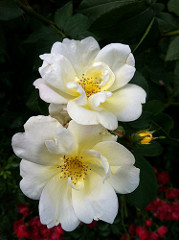

In [9]:
PIL.Image.open(str(roses[0]))

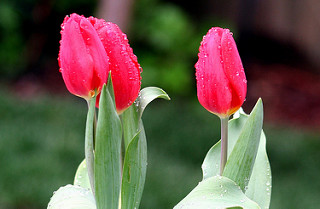

In [10]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_img_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*"))
}

In [12]:
# flowers_img_dict["daisy"]

In [13]:
flowers_label_dict = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4,
}

In [14]:
flowers_img_dict["roses"][0] # cv2 does not accept windows path so use str(folowers_img_dict[])

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [15]:
img = cv2.imread(str(flowers_img_dict["roses"][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [16]:
img.shape

(240, 179, 3)

In [17]:
cv2.resize(img,(180,180)).shape  # All image to specific dimention

(180, 180, 3)

In [18]:
X, y = [], []
for flowername, images in flowers_img_dict.items():
    print(flowername)
    print(images)

roses
[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flower_photos/roses/1

In [19]:
X, y = [], []
for flowername, images in flowers_img_dict.items():
    print(flowername)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [20]:
X, y = [], []
for flowername, images in flowers_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_label_dict[flowername])

In [21]:
y[:5]

[0, 0, 0, 0, 0]

In [22]:
X[:5]

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [23]:
#List to array for convienence
X = np.array(X)
y = np.array(y)

In [24]:
X[:5]

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
X_train.shape

(2752, 180, 180, 3)

In [27]:
X_test.shape

(918, 180, 180, 3)

In [28]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255 

In [29]:
#CNN
num_classes = 5  #Because we have 5 flowers

model = Sequential([
    layers.Conv2D(16, 3, padding= "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= "same" ,activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
86/86 [==============================] - 36s 380ms/step - loss: 1.2823 - accuracy: 0.4662
Epoch 2/10
86/86 [==============================] - 30s 353ms/step - loss: 0.9667 - accuracy: 0.6112
Epoch 3/10
86/86 [==============================] - 30s 354ms/step - loss: 0.8082 - accuracy: 0.6991
Epoch 4/10
86/86 [==============================] - 30s 354ms/step - loss: 0.6498 - accuracy: 0.7711
Epoch 5/10
86/86 [==============================] - 30s 352ms/step - loss: 0.4527 - accuracy: 0.8394
Epoch 6/10
86/86 [==============================] - 30s 352ms/step - loss: 0.2839 - accuracy: 0.9081
Epoch 7/10
86/86 [==============================] - 30s 352ms/step - loss: 0.1727 - accuracy: 0.9455
Epoch 8/10
86/86 [==============================] - 30s 352ms/step - loss: 0.0961 - accuracy: 0.9757
Epoch 9/10
86/86 [==============================] - 30s 352ms/step - loss: 0.0810 - accuracy: 0.9767
Epoch 10/10
86/86 [==============================] - 30s 352ms/step - loss: 0.0797 - accura

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 103ms/step - loss: 1.5784 - accuracy: 0.6155


[1.57837975025177, 0.6154683828353882]

In [31]:
predictions = model.predict(X_test_scaled)
predictions

array([[  1.3417152 ,   8.644415  ,   1.8909032 , -12.708886  ,
        -10.120957  ],
       [  4.4384565 ,  -3.914275  ,  -7.0014453 ,  -3.8749487 ,
         -0.28413266],
       [ -2.3342724 ,  -1.584973  ,   4.9103622 ,  -6.640974  ,
         -2.08887   ],
       ...,
       [ -1.0093318 ,  -2.463591  ,  -5.03622   ,   4.2441854 ,
          3.580475  ],
       [  3.473049  ,  -1.659651  ,  -2.7486188 ,  -4.1573677 ,
         -1.5054625 ],
       [  1.5156139 ,  -7.415525  ,  -3.0264602 ,   3.2793741 ,
          2.3825815 ]], dtype=float32)

In [34]:
#convert numpy array to set of probability
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.7247992e-04, 9.9816293e-01, 1.1646319e-03, 5.3159416e-10,
       7.0713670e-09], dtype=float32)>

In [35]:
np.argmax(score)

1

In [36]:
y_test[0]

1

In [50]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9)
])

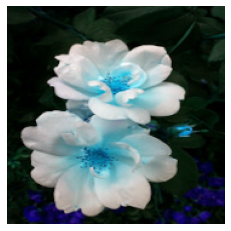

In [51]:
plt.axis("off")
plt.imshow(X[0])

In [48]:
#tensor array
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[7.5170898e-01, 8.0000000e+00, 7.5170898e-01],
        [1.1263046e+00, 8.6561823e+00, 7.5170898e-01],
        [1.7491913e+00, 9.7472992e+00, 7.5170898e-01],
        ...,
        [3.7379622e+00, 7.2501836e+00, 1.2476659e+00],
        [2.0282385e+00, 7.7184072e+00, 1.0930107e+00],
        [1.0000000e+00, 8.0000000e+00, 1.0000000e+00]],

       [[6.2540436e-01, 7.5323954e+00, 7.1841311e-01],
        [8.5967809e-01, 8.2342739e+00, 7.6572627e-01],
        [1.2492341e+00, 9.2467165e+00, 9.9905688e-01],
        ...,
        [1.8758932e+00, 8.4980707e+00, 1.3755388e+00],
        [1.7967740e+00, 8.4209661e+00, 1.6088665e+00],
        [1.6561825e+00, 8.3745956e+00, 1.6561825e+00]],

       [[2.5177002e-03, 6.7548518e+00, 2.5018358e-01],
        [3.4608198e-03, 7.3780565e+00, 3.7617022e-01],
        [5.0290618e-03, 8.0025110e+00, 9.9748862e-01],
        ...,
        [1.5074506e-02, 1.0984913e+01, 1.9999937e+00],
        [1.8758705e+00

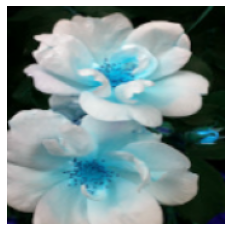

In [52]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))  #Tensor array to numpy array

In [57]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.2)
])

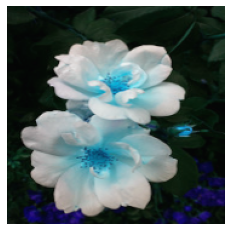

In [58]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))  #Tensor array to numpy array

In [59]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2)
])

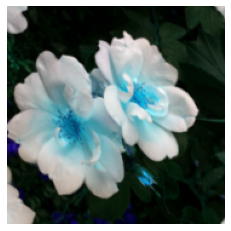

In [60]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))  #Tensor array to numpy array

In [62]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [65]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 [==============================] - 43s 485ms/step - loss: 1.2922 - accuracy: 0.4549
Epoch 2/10
86/86 [==============================] - 42s 485ms/step - loss: 1.0463 - accuracy: 0.5872
Epoch 3/10
86/86 [==============================] - 42s 485ms/step - loss: 0.9361 - accuracy: 0.6363
Epoch 4/10
86/86 [==============================] - 42s 484ms/step - loss: 0.9063 - accuracy: 0.6523
Epoch 5/10
86/86 [==============================] - 42s 484ms/step - loss: 0.8065 - accuracy: 0.6908
Epoch 6/10
86/86 [==============================] - 42s 484ms/step - loss: 0.7564 - accuracy: 0.7108
Epoch 7/10
86/86 [==============================] - 42s 484ms/step - loss: 0.7159 - accuracy: 0.7264
Epoch 8/10
86/86 [==============================] - 42s 487ms/step - loss: 0.6850 - accuracy: 0.7318
Epoch 9/10
86/86 [==============================] - 42s 484ms/step - loss: 0.6664 - accuracy: 0.7427
Epoch 10/10
86/86 [==============================] - 42s 484ms/step - loss: 0.6322 - accura

In [66]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 100ms/step - loss: 0.7794 - accuracy: 0.7059


[0.7793805599212646, 0.7058823704719543]